In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Credit_card_dataset.csv")
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [3]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [4]:
df = df.dropna()
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [5]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.877350,1003.316936,1733.336511,4494.449450,978.959616
std,0.236798,2136.727848,2895.168146,3638.815725,2097.264344
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.800000,383.282850,1600.000000,0.000000
50%,1.000000,361.490000,857.062706,3000.000000,0.000000
75%,1.000000,1110.170000,1901.279320,6500.000000,1113.868654
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [6]:
df.shape

(8949, 6)

#### outlier detection and removal

In [7]:
Q1 = df.PURCHASES.quantile(0.25)
Q1
Q3 = df.PURCHASES.quantile(0.75)
Q1,Q3

(39.8, 1110.17)

In [8]:
IQR = Q3 - Q1
IQR

1070.3700000000001

In [9]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-1565.7550000000003, 2715.7250000000004)

In [10]:
df[(df.PURCHASES < lower_limit) | (df.PURCHASES > upper_limit)]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
6,C10007,1.000000,7091.01,6354.314328,13500.0,0.000000
12,C10013,1.000000,3217.99,608.263689,3000.0,0.000000
21,C10022,1.000000,6359.95,2077.959051,11250.0,229.028245
23,C10024,0.818182,4248.35,9479.043842,9000.0,7974.415626
30,C10031,1.000000,3038.01,4230.323491,13000.0,3183.583301
...,...,...,...,...,...,...
8689,C18926,0.909091,8053.95,7966.582037,2000.0,0.000000
8737,C18975,0.909091,5633.83,8176.953944,9000.0,2451.807788
8748,C18987,0.625000,3950.00,6274.982741,3150.0,0.000000
8758,C18997,0.857143,2918.08,247.249275,3000.0,0.000000


In [11]:
df = df[(df.PURCHASES > lower_limit) & (df.PURCHASES < upper_limit)].reset_index(drop=True)

In [12]:
df.shape

(8141, 6)

In [13]:
df.dtypes

CUST_ID               object
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
from sklearn.preprocessing import StandardScaler  
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<Axes: xlabel='CREDIT_LIMIT'>

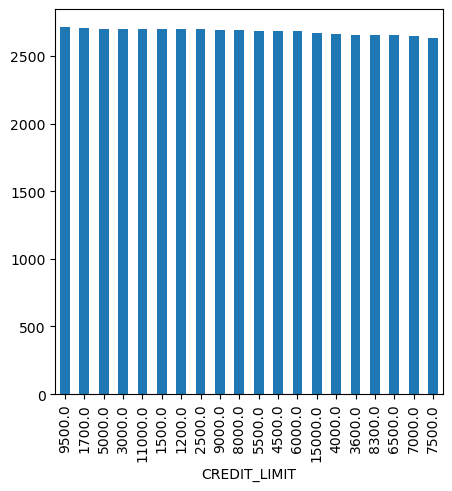

In [17]:
plt.figure(figsize =(5,5))
df.groupby("CREDIT_LIMIT")["PURCHASES"].max().sort_values(ascending=False).iloc[:20].plot(kind="bar")

In [18]:
scaler = StandardScaler()

In [34]:
scaling = df.iloc[:, 1:]

In [35]:
scaled_data = scaler.fit_transform(scaling)

In [36]:
pd.DataFrame(scaled_data, columns=scaling.columns).describe().round(3)

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8141.000,8141.000,8141.000,8141.000,8141.000
mean,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-3.548,-0.831,-0.630,-1.227,-0.487
25%,-0.142,-0.831,-0.468,-0.792,-0.487
50%,0.540,-0.386,-0.286,-0.343,-0.478
75%,0.540,0.428,0.094,0.557,0.084
max,0.540,3.337,18.064,6.252,22.548


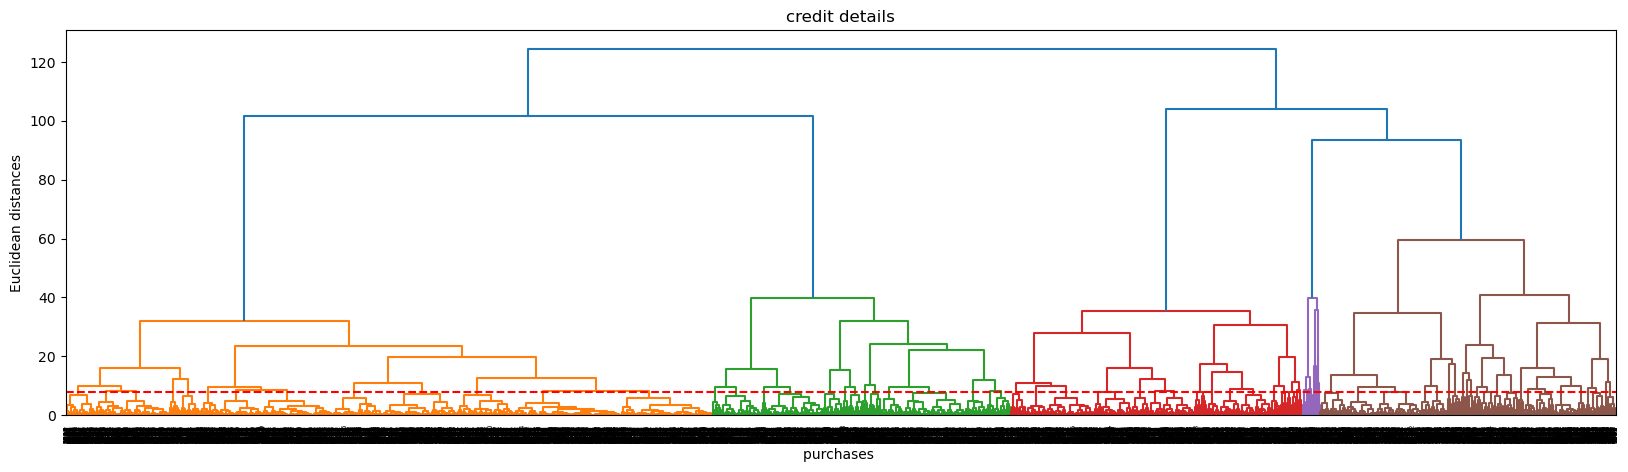

In [46]:
plt.figure(figsize=(20, 5))
plt.title("credit details")
dend = sch.dendrogram(sch.linkage(scaled_data, method="ward"))
plt.xlabel("purchases ")
plt.ylabel("Euclidean distances")
plt.axhline(y=8, color='r', linestyle='--')

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
AC = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
AC

AgglomerativeClustering()

In [40]:
y_pred = AC.fit_predict(scaled_data)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
df["cluster labels"] = y_pred

In [44]:
df[["PURCHASES", "cluster labels"]]

,PURCHASES,cluster labels
0,95.40,1
1,0.00,0
2,773.17,0
3,1499.00,0
4,16.00,1
...,...,...
8136,291.12,1
8137,300.00,1
8138,144.40,1
8139,0.00,1


#### partitional clustering ( k means)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,cluster labels
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000,1
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483,0
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000,0
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017,0
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000,1
...,...,...,...,...,...,...,...
8136,C19186,1.000000,291.12,325.594462,1000.0,0.000000,1
8137,C19187,1.000000,300.00,275.861322,1000.0,0.000000,1
8138,C19188,0.833333,144.40,81.270775,1000.0,0.000000,1
8139,C19189,0.833333,0.00,52.549959,500.0,36.558778,1


In [61]:
df.drop(columns=['CUST_ID', 'cluster labels'], inplace=True)  

In [62]:
df

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8136,1.000000,291.12,325.594462,1000.0,0.000000
8137,1.000000,300.00,275.861322,1000.0,0.000000
8138,0.833333,144.40,81.270775,1000.0,0.000000
8139,0.833333,0.00,52.549959,500.0,36.558778


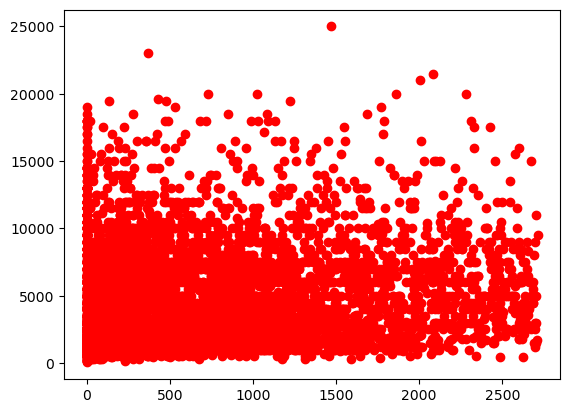

In [57]:
plt.scatter(df.PURCHASES, df["CREDIT_LIMIT"],color = "red")

In [64]:
from sklearn.cluster import KMeans

In [65]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [66]:
y_predicted = km.fit_predict(df[["PURCHASES", "CREDIT_LIMIT"]])
y_predicted

array([0, 4, 4, ..., 0, 0, 0])

In [68]:
df["cluster"] = y_predicted
df.head(10)

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,cluster
0,0.818182,95.40,201.802084,1000.0,0.000000,0
1,0.909091,0.00,4103.032597,7000.0,6442.945483,4
2,1.000000,773.17,622.066742,7500.0,0.000000,4
3,0.636364,1499.00,0.000000,7500.0,205.788017,4
4,1.000000,16.00,678.334763,1200.0,0.000000,0
5,1.000000,1333.28,1400.057770,1800.0,0.000000,0
6,1.000000,436.20,679.065082,2300.0,0.000000,0
7,1.000000,861.49,688.278568,7000.0,0.000000,4
8,0.545455,1281.60,1164.770591,11000.0,0.000000,1
9,1.000000,920.12,1083.301007,1200.0,0.000000,0


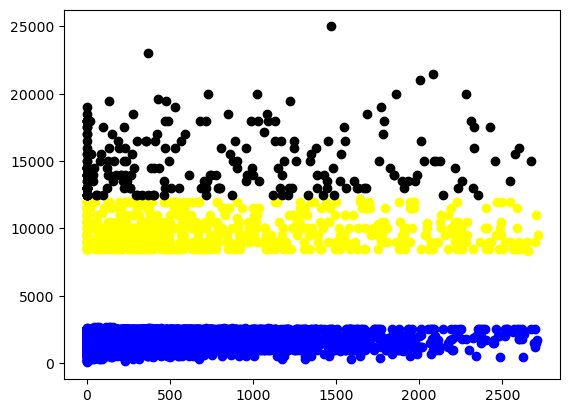

In [69]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.PURCHASES, df1["CREDIT_LIMIT"], color="blue")
plt.scatter(df2.PURCHASES, df2["CREDIT_LIMIT"], color="yellow")
plt.scatter(df3.PURCHASES, df3["CREDIT_LIMIT"], color="black")